In [25]:
import pickle
from glob import iglob
import numpy as np
import librosa
from shutil import rmtree
import os
# from constants import *

DATA_AUDIO_DIR = '../augmentation4_train_data'
list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

OUTPUT_DIR = '../output_una_augmentation'

OUTPUT_DIR_TRAIN = os.path.join(OUTPUT_DIR, 'train')
OUTPUT_DIR_TEST = os.path.join(OUTPUT_DIR, 'test')


PAD_SIZE = 0
TARGET_SR = 8000
AUDIO_LENGTH = TARGET_SR * 10
SEGMENT_NUM = 1

In [26]:
def mkdir_p(path):
    import errno
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise


def del_folder(path):
    try:
        rmtree(path)
    except:
        pass

### Delete pickle file & Make directory

In [27]:
del_folder(OUTPUT_DIR_TRAIN)
del_folder(OUTPUT_DIR_TEST)
mkdir_p(OUTPUT_DIR_TRAIN)
mkdir_p(OUTPUT_DIR_TEST)

In [28]:
order = 0
list_dir.sort()
class_ids = {list_dir[i]: i for i in range(len(list_dir))}

def extract_class_id(wav_filename):
    return class_ids.get(wav_filename.split('/')[2])

def read_audio_from_filename(filename, target_sr):
    audio, _ = librosa.load(filename, sr=TARGET_SR, mono=True)
    audio = audio.reshape(-1, 1)
    return audio


def convert_data():

    for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_DIR, '**/**.wav'), recursive=True)):
        class_id = extract_class_id(wav_filename)
        audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        
        voice_seg = []
        voice_seg.append(audio_buf[PAD_SIZE : AUDIO_LENGTH + PAD_SIZE])
        
        output_folder = OUTPUT_DIR_TRAIN
        if wav_filename[-5:] == '5.wav' or wav_filename[-5:] == '8.wav':
            output_folder = OUTPUT_DIR_TEST

        output_filename = os.path.join(output_folder, str(wav_filename[27:-4]).replace('/', '_') + '.pkl')
        out_segs = []
        for i_seg, audio_seg in enumerate(voice_seg) :
            out = {'class_id': class_id,
               'audio': audio_seg,
               'sr': TARGET_SR}
            
            with open(str(output_filename+"_"+str(i_seg)), 'wb') as w:
                pickle.dump(out, w)

            print(str(output_filename+"_"+str(i_seg)))
        
        print("-----------------")
      

### Convert Data

In [29]:
convert_data()

0 ../augmentation4_train_data/2017019770040_kimdajeong/5.wav 201088 -0.0 1.0
../output_una_augmentation/test/_2017019770040_kimdajeong_5.pkl_0
-----------------
1 ../augmentation4_train_data/2017019770040_kimdajeong/4.wav 195712 -0.0 0.9999999
../output_una_augmentation/train/_2017019770040_kimdajeong_4.pkl_0
-----------------
2 ../augmentation4_train_data/2017019770040_kimdajeong/8.wav 298514 0.0 1.0000001
../output_una_augmentation/test/_2017019770040_kimdajeong_8.pkl_0
-----------------
3 ../augmentation4_train_data/2017019770040_kimdajeong/6.wav 178018 0.0 1.0
../output_una_augmentation/train/_2017019770040_kimdajeong_6.pkl_0
-----------------
4 ../augmentation4_train_data/2017019770040_kimdajeong/7.wav 306011 -0.0 1.0
../output_una_augmentation/train/_2017019770040_kimdajeong_7.pkl_0
-----------------
5 ../augmentation4_train_data/2017019770040_kimdajeong/3.wav 208960 -0.0 1.0
../output_una_augmentation/train/_2017019770040_kimdajeong_3.pkl_0
-----------------
6 ../augmentation4_t

50 ../augmentation4_train_data/2017019770005_hyeonsanghyeok/5.wav 185718 -0.0 0.99999994
../output_una_augmentation/test/_2017019770005_hyeonsanghyeok_5.pkl_0
-----------------
51 ../augmentation4_train_data/2017019770005_hyeonsanghyeok/4.wav 189910 -0.0 1.0
../output_una_augmentation/train/_2017019770005_hyeonsanghyeok_4.pkl_0
-----------------
52 ../augmentation4_train_data/2017019770005_hyeonsanghyeok/8.wav 271787 -0.0 1.0
../output_una_augmentation/test/_2017019770005_hyeonsanghyeok_8.pkl_0
-----------------
53 ../augmentation4_train_data/2017019770005_hyeonsanghyeok/6.wav 274149 0.0 1.0
../output_una_augmentation/train/_2017019770005_hyeonsanghyeok_6.pkl_0
-----------------
54 ../augmentation4_train_data/2017019770005_hyeonsanghyeok/7.wav 284069 -0.0 0.99999994
../output_una_augmentation/train/_2017019770005_hyeonsanghyeok_7.pkl_0
-----------------
55 ../augmentation4_train_data/2017019770005_hyeonsanghyeok/3.wav 190251 0.0 1.0
../output_una_augmentation/train/_2017019770005_hyeon

100 ../augmentation4_train_data/2017019880017_sungsoohyun/5.wav 230635 -0.0 0.99999994
../output_una_augmentation/test/_2017019880017_sungsoohyun_5.pkl_0
-----------------
101 ../augmentation4_train_data/2017019880017_sungsoohyun/4.wav 240480 0.0 1.0000001
../output_una_augmentation/train/_2017019880017_sungsoohyun_4.pkl_0
-----------------
102 ../augmentation4_train_data/2017019880017_sungsoohyun/8.wav 307734 0.0 1.0
../output_una_augmentation/test/_2017019880017_sungsoohyun_8.pkl_0
-----------------
103 ../augmentation4_train_data/2017019880017_sungsoohyun/6.wav 172554 -0.0 1.0
../output_una_augmentation/train/_2017019880017_sungsoohyun_6.pkl_0
-----------------
104 ../augmentation4_train_data/2017019880017_sungsoohyun/7.wav 306743 0.0 1.0
../output_una_augmentation/train/_2017019880017_sungsoohyun_7.pkl_0
-----------------
105 ../augmentation4_train_data/2017019880017_sungsoohyun/3.wav 215414 -0.0 0.9999999
../output_una_augmentation/train/_2017019880017_sungsoohyun_3.pkl_0
--------

160 ../augmentation4_train_data/2017019880045_kimdohee/5.wav 215853 -0.0 0.9999999
../output_una_augmentation/test/_2017019880045_kimdohee_5.pkl_0
-----------------
161 ../augmentation4_train_data/2017019880045_kimdohee/4.wav 219383 0.0 0.99999994
../output_una_augmentation/train/_2017019880045_kimdohee_4.pkl_0
-----------------
162 ../augmentation4_train_data/2017019880045_kimdohee/8.wav 303054 0.0 0.99999994
../output_una_augmentation/test/_2017019880045_kimdohee_8.pkl_0
-----------------
163 ../augmentation4_train_data/2017019880045_kimdohee/6.wav 299870 -0.0 1.0
../output_una_augmentation/train/_2017019880045_kimdohee_6.pkl_0
-----------------
164 ../augmentation4_train_data/2017019880045_kimdohee/7.wav 313404 -0.0 0.9999998
../output_una_augmentation/train/_2017019880045_kimdohee_7.pkl_0
-----------------
165 ../augmentation4_train_data/2017019880045_kimdohee/3.wav 212138 -0.0 1.0000001
../output_una_augmentation/train/_2017019880045_kimdohee_3.pkl_0
-----------------
166 ../augme

210 ../augmentation4_train_data/2017019740006_kangsubin/5.wav 234822 -0.0 0.9999999
../output_una_augmentation/test/_2017019740006_kangsubin_5.pkl_0
-----------------
211 ../augmentation4_train_data/2017019740006_kangsubin/4.wav 234526 -0.0 1.0000001
../output_una_augmentation/train/_2017019740006_kangsubin_4.pkl_0
-----------------
212 ../augmentation4_train_data/2017019740006_kangsubin/8.wav 179423 0.0 0.9999999
../output_una_augmentation/test/_2017019740006_kangsubin_8.pkl_0
-----------------
213 ../augmentation4_train_data/2017019740006_kangsubin/6.wav 176107 -0.0 1.0
../output_una_augmentation/train/_2017019740006_kangsubin_6.pkl_0
-----------------
214 ../augmentation4_train_data/2017019740006_kangsubin/7.wav 187096 0.0 1.0
../output_una_augmentation/train/_2017019740006_kangsubin_7.pkl_0
-----------------
215 ../augmentation4_train_data/2017019740006_kangsubin/3.wav 233250 0.0 1.0
../output_una_augmentation/train/_2017019740006_kangsubin_3.pkl_0
-----------------
216 ../augmenta

260 ../augmentation4_train_data/2017019880039_seojuyeon/5.wav 229472 0.0 1.0
../output_una_augmentation/test/_2017019880039_seojuyeon_5.pkl_0
-----------------
261 ../augmentation4_train_data/2017019880039_seojuyeon/4.wav 225760 0.0 1.0
../output_una_augmentation/train/_2017019880039_seojuyeon_4.pkl_0
-----------------
262 ../augmentation4_train_data/2017019880039_seojuyeon/8.wav 174482 0.0 1.0
../output_una_augmentation/test/_2017019880039_seojuyeon_8.pkl_0
-----------------
263 ../augmentation4_train_data/2017019880039_seojuyeon/6.wav 171397 -0.0 1.0
../output_una_augmentation/train/_2017019880039_seojuyeon_6.pkl_0
-----------------
264 ../augmentation4_train_data/2017019880039_seojuyeon/7.wav 173022 -0.0 0.99999994
../output_una_augmentation/train/_2017019880039_seojuyeon_7.pkl_0
-----------------
265 ../augmentation4_train_data/2017019880039_seojuyeon/3.wav 226827 -0.0 1.0000001
../output_una_augmentation/train/_2017019880039_seojuyeon_3.pkl_0
-----------------
266 ../augmentation4

310 ../augmentation4_train_data/2017019770009_yuminji/5.wav 230240 0.0 0.99999994
../output_una_augmentation/test/_2017019770009_yuminji_5.pkl_0
-----------------
311 ../augmentation4_train_data/2017019770009_yuminji/4.wav 231712 0.0 1.0
../output_una_augmentation/train/_2017019770009_yuminji_4.pkl_0
-----------------
312 ../augmentation4_train_data/2017019770009_yuminji/8.wav 307931 -0.0 0.99999994
../output_una_augmentation/test/_2017019770009_yuminji_8.pkl_0
-----------------
313 ../augmentation4_train_data/2017019770009_yuminji/6.wav 299109 0.0 0.99999994
../output_una_augmentation/train/_2017019770009_yuminji_6.pkl_0
-----------------
314 ../augmentation4_train_data/2017019770009_yuminji/7.wav 174695 -0.0 1.0
../output_una_augmentation/train/_2017019770009_yuminji_7.pkl_0
-----------------
315 ../augmentation4_train_data/2017019770009_yuminji/3.wav 215552 -0.0 0.99999994
../output_una_augmentation/train/_2017019770009_yuminji_3.pkl_0
-----------------
316 ../augmentation4_train_da

360 ../augmentation4_train_data/2017019740018_eundano/5.wav 179708 0.0 0.9999999
../output_una_augmentation/test/_2017019740018_eundano_5.pkl_0
-----------------
361 ../augmentation4_train_data/2017019740018_eundano/4.wav 181700 -0.0 1.0
../output_una_augmentation/train/_2017019740018_eundano_4.pkl_0
-----------------
362 ../augmentation4_train_data/2017019740018_eundano/8.wav 298619 -0.0 1.0
../output_una_augmentation/test/_2017019740018_eundano_8.pkl_0
-----------------
363 ../augmentation4_train_data/2017019740018_eundano/6.wav 308331 0.0 1.0000001
../output_una_augmentation/train/_2017019740018_eundano_6.pkl_0
-----------------
364 ../augmentation4_train_data/2017019740018_eundano/7.wav 281029 0.0 1.0
../output_una_augmentation/train/_2017019740018_eundano_7.pkl_0
-----------------
365 ../augmentation4_train_data/2017019740018_eundano/3.wav 209033 -0.0 1.0000001
../output_una_augmentation/train/_2017019740018_eundano_3.pkl_0
-----------------
366 ../augmentation4_train_data/2017019

410 ../augmentation4_train_data/2017019740041_jeonggaeun/5.wav 187776 -0.0 1.0
../output_una_augmentation/test/_2017019740041_jeonggaeun_5.pkl_0
-----------------
411 ../augmentation4_train_data/2017019740041_jeonggaeun/4.wav 174304 -0.0 1.0
../output_una_augmentation/train/_2017019740041_jeonggaeun_4.pkl_0
-----------------
412 ../augmentation4_train_data/2017019740041_jeonggaeun/8.wav 250789 0.0 1.0
../output_una_augmentation/test/_2017019740041_jeonggaeun_8.pkl_0
-----------------
413 ../augmentation4_train_data/2017019740041_jeonggaeun/6.wav 276069 0.0 0.99999976
../output_una_augmentation/train/_2017019740041_jeonggaeun_6.pkl_0
-----------------
414 ../augmentation4_train_data/2017019740041_jeonggaeun/7.wav 257783 -0.0 1.0
../output_una_augmentation/train/_2017019740041_jeonggaeun_7.pkl_0
-----------------
415 ../augmentation4_train_data/2017019740041_jeonggaeun/3.wav 175552 0.0 0.9999999
../output_una_augmentation/train/_2017019740041_jeonggaeun_3.pkl_0
-----------------
416 ../a

460 ../augmentation4_train_data/2017019770025_kimhyeonsu/5.wav 219296 0.0 0.99999994
../output_una_augmentation/test/_2017019770025_kimhyeonsu_5.pkl_0
-----------------
461 ../augmentation4_train_data/2017019770025_kimhyeonsu/4.wav 202475 -0.0 0.9999999
../output_una_augmentation/train/_2017019770025_kimhyeonsu_4.pkl_0
-----------------
462 ../augmentation4_train_data/2017019770025_kimhyeonsu/8.wav 295726 -0.0 1.0
../output_una_augmentation/test/_2017019770025_kimhyeonsu_8.pkl_0
-----------------
463 ../augmentation4_train_data/2017019770025_kimhyeonsu/6.wav 294994 0.0 1.0
../output_una_augmentation/train/_2017019770025_kimhyeonsu_6.pkl_0
-----------------
464 ../augmentation4_train_data/2017019770025_kimhyeonsu/7.wav 171709 -0.0 1.0
../output_una_augmentation/train/_2017019770025_kimhyeonsu_7.pkl_0
-----------------
465 ../augmentation4_train_data/2017019770025_kimhyeonsu/3.wav 207008 -0.0 0.99999994
../output_una_augmentation/train/_2017019770025_kimhyeonsu_3.pkl_0
-----------------


510 ../augmentation4_train_data/2017019770004_leebyeongjin/5.wav 164004 0.0 1.0
../output_una_augmentation/test/_2017019770004_leebyeongjin_5.pkl_0
-----------------
511 ../augmentation4_train_data/2017019770004_leebyeongjin/4.wav 204769 0.0 1.0
../output_una_augmentation/train/_2017019770004_leebyeongjin_4.pkl_0
-----------------
512 ../augmentation4_train_data/2017019770004_leebyeongjin/8.wav 270427 0.0 0.99999994
../output_una_augmentation/test/_2017019770004_leebyeongjin_8.pkl_0
-----------------
513 ../augmentation4_train_data/2017019770004_leebyeongjin/6.wav 287734 0.0 0.9999999
../output_una_augmentation/train/_2017019770004_leebyeongjin_6.pkl_0
-----------------
514 ../augmentation4_train_data/2017019770004_leebyeongjin/7.wav 299174 0.0 1.0000001
../output_una_augmentation/train/_2017019770004_leebyeongjin_7.pkl_0
-----------------
515 ../augmentation4_train_data/2017019770004_leebyeongjin/3.wav 189299 0.0 1.0
../output_una_augmentation/train/_2017019770004_leebyeongjin_3.pkl_0

560 ../augmentation4_train_data/2017019770019_leewooju/5.wav 195927 0.0 0.99999994
../output_una_augmentation/test/_2017019770019_leewooju_5.pkl_0
-----------------
561 ../augmentation4_train_data/2017019770019_leewooju/4.wav 216799 0.0 1.0
../output_una_augmentation/train/_2017019770019_leewooju_4.pkl_0
-----------------
562 ../augmentation4_train_data/2017019770019_leewooju/8.wav 226027 -0.0 1.0
../output_una_augmentation/test/_2017019770019_leewooju_8.pkl_0
-----------------
563 ../augmentation4_train_data/2017019770019_leewooju/6.wav 199492 -0.0 0.99999994
../output_una_augmentation/train/_2017019770019_leewooju_6.pkl_0
-----------------
564 ../augmentation4_train_data/2017019770019_leewooju/7.wav 195097 -0.0 0.99999994
../output_una_augmentation/train/_2017019770019_leewooju_7.pkl_0
-----------------
565 ../augmentation4_train_data/2017019770019_leewooju/3.wav 339040 0.0 1.0
../output_una_augmentation/train/_2017019770019_leewooju_3.pkl_0
-----------------
566 ../augmentation4_tra

610 ../augmentation4_train_data/2017019740026_parkyeongseon/5.wav 318315 0.0 1.0000001
../output_una_augmentation/test/_2017019740026_parkyeongseon_5.pkl_0
-----------------
611 ../augmentation4_train_data/2017019740026_parkyeongseon/4.wav 254240 0.0 0.99999994
../output_una_augmentation/train/_2017019740026_parkyeongseon_4.pkl_0
-----------------
612 ../augmentation4_train_data/2017019740026_parkyeongseon/8.wav 186405 0.0 0.99999994
../output_una_augmentation/test/_2017019740026_parkyeongseon_8.pkl_0
-----------------
613 ../augmentation4_train_data/2017019740026_parkyeongseon/6.wav 202372 0.0 1.0
../output_una_augmentation/train/_2017019740026_parkyeongseon_6.pkl_0
-----------------
614 ../augmentation4_train_data/2017019740026_parkyeongseon/7.wav 193649 0.0 1.0
../output_una_augmentation/train/_2017019740026_parkyeongseon_7.pkl_0
-----------------
615 ../augmentation4_train_data/2017019740026_parkyeongseon/3.wav 242326 0.0 1.0000001
../output_una_augmentation/train/_2017019740026_pa

660 ../augmentation4_train_data/2017019740030_kanghyeyeon/5.wav 191467 -0.0 1.0
../output_una_augmentation/test/_2017019740030_kanghyeyeon_5.pkl_0
-----------------
661 ../augmentation4_train_data/2017019740030_kanghyeyeon/4.wav 198998 0.0 0.99999994
../output_una_augmentation/train/_2017019740030_kanghyeyeon_4.pkl_0
-----------------
662 ../augmentation4_train_data/2017019740030_kanghyeyeon/8.wav 292434 -0.0 1.0
../output_una_augmentation/test/_2017019740030_kanghyeyeon_8.pkl_0
-----------------
663 ../augmentation4_train_data/2017019740030_kanghyeyeon/6.wav 171446 -0.0 0.99999994
../output_una_augmentation/train/_2017019740030_kanghyeyeon_6.pkl_0
-----------------
664 ../augmentation4_train_data/2017019740030_kanghyeyeon/7.wav 301197 0.0 0.99999994
../output_una_augmentation/train/_2017019740030_kanghyeyeon_7.pkl_0
-----------------
665 ../augmentation4_train_data/2017019740030_kanghyeyeon/3.wav 204704 -0.0 0.99999994
../output_una_augmentation/train/_2017019740030_kanghyeyeon_3.pkl_

710 ../augmentation4_train_data/2017019880011_kimjihyun/5.wav 211244 -0.0 0.9999999
../output_una_augmentation/test/_2017019880011_kimjihyun_5.pkl_0
-----------------
711 ../augmentation4_train_data/2017019880011_kimjihyun/4.wav 209189 0.0 1.0
../output_una_augmentation/train/_2017019880011_kimjihyun_4.pkl_0
-----------------
712 ../augmentation4_train_data/2017019880011_kimjihyun/8.wav 173735 0.0 0.99999994
../output_una_augmentation/test/_2017019880011_kimjihyun_8.pkl_0
-----------------
713 ../augmentation4_train_data/2017019880011_kimjihyun/6.wav 300640 0.0 1.0
../output_una_augmentation/train/_2017019880011_kimjihyun_6.pkl_0
-----------------
714 ../augmentation4_train_data/2017019880011_kimjihyun/7.wav 291686 0.0 1.0
../output_una_augmentation/train/_2017019880011_kimjihyun_7.pkl_0
-----------------
715 ../augmentation4_train_data/2017019880011_kimjihyun/3.wav 225856 -0.0 1.0
../output_una_augmentation/train/_2017019880011_kimjihyun_3.pkl_0
-----------------
716 ../augmentation4_

760 ../augmentation4_train_data/2017019740031_jominseok/5.wav 240000 -0.0 0.99999994
../output_una_augmentation/test/_2017019740031_jominseok_5.pkl_0
-----------------
761 ../augmentation4_train_data/2017019740031_jominseok/4.wav 200608 0.0 1.0
../output_una_augmentation/train/_2017019740031_jominseok_4.pkl_0
-----------------
762 ../augmentation4_train_data/2017019740031_jominseok/8.wav 288214 -0.0 0.99999994
../output_una_augmentation/test/_2017019740031_jominseok_8.pkl_0
-----------------
763 ../augmentation4_train_data/2017019740031_jominseok/6.wav 184895 0.0 0.99999994
../output_una_augmentation/train/_2017019740031_jominseok_6.pkl_0
-----------------
764 ../augmentation4_train_data/2017019740031_jominseok/7.wav 292191 -0.0 0.99999994
../output_una_augmentation/train/_2017019740031_jominseok_7.pkl_0
-----------------
765 ../augmentation4_train_data/2017019740031_jominseok/3.wav 201750 -0.0 0.9999999
../output_una_augmentation/train/_2017019740031_jominseok_3.pkl_0
----------------

810 ../augmentation4_train_data/2017019740043_kimtaeri/5.wav 265152 -0.0 1.0
../output_una_augmentation/test/_2017019740043_kimtaeri_5.pkl_0
-----------------
811 ../augmentation4_train_data/2017019740043_kimtaeri/4.wav 266379 0.0 1.0
../output_una_augmentation/train/_2017019740043_kimtaeri_4.pkl_0
-----------------
812 ../augmentation4_train_data/2017019740043_kimtaeri/8.wav 202568 0.0 1.0
../output_una_augmentation/test/_2017019740043_kimtaeri_8.pkl_0
-----------------
813 ../augmentation4_train_data/2017019740043_kimtaeri/6.wav 187840 0.0 1.0
../output_una_augmentation/train/_2017019740043_kimtaeri_6.pkl_0
-----------------
814 ../augmentation4_train_data/2017019740043_kimtaeri/7.wav 181653 0.0 0.9999999
../output_una_augmentation/train/_2017019740043_kimtaeri_7.pkl_0
-----------------
815 ../augmentation4_train_data/2017019740043_kimtaeri/3.wav 263339 0.0 1.0
../output_una_augmentation/train/_2017019740043_kimtaeri_3.pkl_0
-----------------
816 ../augmentation4_train_data/201701974

861 ../augmentation4_train_data/2017019740040_kimjihyeon/4.wav 245446 -0.0 0.99999994
../output_una_augmentation/train/_2017019740040_kimjihyeon_4.pkl_0
-----------------
862 ../augmentation4_train_data/2017019740040_kimjihyeon/8.wav 188827 0.0 1.0
../output_una_augmentation/test/_2017019740040_kimjihyeon_8.pkl_0
-----------------
863 ../augmentation4_train_data/2017019740040_kimjihyeon/6.wav 170562 0.0 0.9999999
../output_una_augmentation/train/_2017019740040_kimjihyeon_6.pkl_0
-----------------
864 ../augmentation4_train_data/2017019740040_kimjihyeon/7.wav 174648 -0.0 0.99999994
../output_una_augmentation/train/_2017019740040_kimjihyeon_7.pkl_0
-----------------
865 ../augmentation4_train_data/2017019740040_kimjihyeon/3.wav 245475 -0.0 1.0
../output_una_augmentation/train/_2017019740040_kimjihyeon_3.pkl_0
-----------------
866 ../augmentation4_train_data/2017019740040_kimjihyeon/2.wav 227043 -0.0 0.99999994
../output_una_augmentation/train/_2017019740040_kimjihyeon_2.pkl_0
----------

920 ../augmentation4_train_data/2017019740001_kwakjuheon/5.wav 207360 -0.0 1.0000001
../output_una_augmentation/test/_2017019740001_kwakjuheon_5.pkl_0
-----------------
921 ../augmentation4_train_data/2017019740001_kwakjuheon/4.wav 216960 -0.0 0.99999994
../output_una_augmentation/train/_2017019740001_kwakjuheon_4.pkl_0
-----------------
922 ../augmentation4_train_data/2017019740001_kwakjuheon/8.wav 300663 0.0 1.0
../output_una_augmentation/test/_2017019740001_kwakjuheon_8.pkl_0
-----------------
923 ../augmentation4_train_data/2017019740001_kwakjuheon/6.wav 295529 -0.0 1.0
../output_una_augmentation/train/_2017019740001_kwakjuheon_6.pkl_0
-----------------
924 ../augmentation4_train_data/2017019740001_kwakjuheon/7.wav 286629 0.0 0.99999994
../output_una_augmentation/train/_2017019740001_kwakjuheon_7.pkl_0
-----------------
925 ../augmentation4_train_data/2017019740001_kwakjuheon/3.wav 210464 -0.0 1.0
../output_una_augmentation/train/_2017019740001_kwakjuheon_3.pkl_0
-----------------


970 ../augmentation4_train_data/2017019770026_chaesonghwa/5.wav 215675 0.0 1.0
../output_una_augmentation/test/_2017019770026_chaesonghwa_5.pkl_0
-----------------
971 ../augmentation4_train_data/2017019770026_chaesonghwa/4.wav 219505 -0.0 0.99999994
../output_una_augmentation/train/_2017019770026_chaesonghwa_4.pkl_0
-----------------
972 ../augmentation4_train_data/2017019770026_chaesonghwa/8.wav 173763 -0.0 1.0000001
../output_una_augmentation/test/_2017019770026_chaesonghwa_8.pkl_0
-----------------
973 ../augmentation4_train_data/2017019770026_chaesonghwa/6.wav 180785 -0.0 1.0
../output_una_augmentation/train/_2017019770026_chaesonghwa_6.pkl_0
-----------------
974 ../augmentation4_train_data/2017019770026_chaesonghwa/7.wav 176776 0.0 1.0
../output_una_augmentation/train/_2017019770026_chaesonghwa_7.pkl_0
-----------------
975 ../augmentation4_train_data/2017019770026_chaesonghwa/3.wav 225892 -0.0 0.99999994
../output_una_augmentation/train/_2017019770026_chaesonghwa_3.pkl_0
------

1020 ../augmentation4_train_data/2017019770030_leejeongju/5.wav 223542 -0.0 0.99999994
../output_una_augmentation/test/_2017019770030_leejeongju_5.pkl_0
-----------------
1021 ../augmentation4_train_data/2017019770030_leejeongju/4.wav 215308 -0.0 0.99999994
../output_una_augmentation/train/_2017019770030_leejeongju_4.pkl_0
-----------------
1022 ../augmentation4_train_data/2017019770030_leejeongju/8.wav 295291 0.0 0.9999999
../output_una_augmentation/test/_2017019770030_leejeongju_8.pkl_0
-----------------
1023 ../augmentation4_train_data/2017019770030_leejeongju/6.wav 308296 -0.0 0.99999994
../output_una_augmentation/train/_2017019770030_leejeongju_6.pkl_0
-----------------
1024 ../augmentation4_train_data/2017019770030_leejeongju/7.wav 294067 0.0 0.99999994
../output_una_augmentation/train/_2017019770030_leejeongju_7.pkl_0
-----------------
1025 ../augmentation4_train_data/2017019770030_leejeongju/3.wav 206704 -0.0 1.0
../output_una_augmentation/train/_2017019770030_leejeongju_3.pkl_

1070 ../augmentation4_train_data/2017019770023_kimsoyung/5.wav 218240 0.0 0.99999994
../output_una_augmentation/test/_2017019770023_kimsoyung_5.pkl_0
-----------------
1071 ../augmentation4_train_data/2017019770023_kimsoyung/4.wav 221440 0.0 1.0
../output_una_augmentation/train/_2017019770023_kimsoyung_4.pkl_0
-----------------
1072 ../augmentation4_train_data/2017019770023_kimsoyung/8.wav 178585 -0.0 1.0
../output_una_augmentation/test/_2017019770023_kimsoyung_8.pkl_0
-----------------
1073 ../augmentation4_train_data/2017019770023_kimsoyung/6.wav 195200 -0.0 0.99999994
../output_una_augmentation/train/_2017019770023_kimsoyung_6.pkl_0
-----------------
1074 ../augmentation4_train_data/2017019770023_kimsoyung/7.wav 188760 -0.0 1.0
../output_una_augmentation/train/_2017019770023_kimsoyung_7.pkl_0
-----------------
1075 ../augmentation4_train_data/2017019770023_kimsoyung/3.wav 232160 0.0 1.0
../output_una_augmentation/train/_2017019770023_kimsoyung_3.pkl_0
-----------------
1076 ../augme

1120 ../augmentation4_train_data/2017019880025_yoojungkyun/5.wav 208022 0.0 1.0
../output_una_augmentation/test/_2017019880025_yoojungkyun_5.pkl_0
-----------------
1121 ../augmentation4_train_data/2017019880025_yoojungkyun/4.wav 218667 0.0 1.0
../output_una_augmentation/train/_2017019880025_yoojungkyun_4.pkl_0
-----------------
1122 ../augmentation4_train_data/2017019880025_yoojungkyun/8.wav 273661 0.0 1.0
../output_una_augmentation/test/_2017019880025_yoojungkyun_8.pkl_0
-----------------
1123 ../augmentation4_train_data/2017019880025_yoojungkyun/6.wav 312137 0.0 1.0
../output_una_augmentation/train/_2017019880025_yoojungkyun_6.pkl_0
-----------------
1124 ../augmentation4_train_data/2017019880025_yoojungkyun/7.wav 309943 0.0 0.99999994
../output_una_augmentation/train/_2017019880025_yoojungkyun_7.pkl_0
-----------------
1125 ../augmentation4_train_data/2017019880025_yoojungkyun/3.wav 191563 -0.0 1.0000001
../output_una_augmentation/train/_2017019880025_yoojungkyun_3.pkl_0
----------

1170 ../augmentation4_train_data/2017019740004_parksohui/5.wav 225046 0.0 1.0
../output_una_augmentation/test/_2017019740004_parksohui_5.pkl_0
-----------------
1171 ../augmentation4_train_data/2017019740004_parksohui/4.wav 219104 0.0 1.0
../output_una_augmentation/train/_2017019740004_parksohui_4.pkl_0
-----------------
1172 ../augmentation4_train_data/2017019740004_parksohui/8.wav 172981 -0.0 1.0
../output_una_augmentation/test/_2017019740004_parksohui_8.pkl_0
-----------------
1173 ../augmentation4_train_data/2017019740004_parksohui/6.wav 179750 -0.0 1.0
../output_una_augmentation/train/_2017019740004_parksohui_6.pkl_0
-----------------
1174 ../augmentation4_train_data/2017019740004_parksohui/7.wav 176960 0.0 1.0
../output_una_augmentation/train/_2017019740004_parksohui_7.pkl_0
-----------------
1175 ../augmentation4_train_data/2017019740004_parksohui/3.wav 224875 -0.0 0.99999994
../output_una_augmentation/train/_2017019740004_parksohui_3.pkl_0
-----------------
1176 ../augmentation

1230 ../augmentation4_train_data/2017019740016_kangyeseo/5.wav 208790 0.0 0.9999999
../output_una_augmentation/test/_2017019740016_kangyeseo_5.pkl_0
-----------------
1231 ../augmentation4_train_data/2017019740016_kangyeseo/4.wav 213323 -0.0 1.0
../output_una_augmentation/train/_2017019740016_kangyeseo_4.pkl_0
-----------------
1232 ../augmentation4_train_data/2017019740016_kangyeseo/8.wav 171578 -0.0 0.99999994
../output_una_augmentation/test/_2017019740016_kangyeseo_8.pkl_0
-----------------
1233 ../augmentation4_train_data/2017019740016_kangyeseo/6.wav 311330 0.0 1.0
../output_una_augmentation/train/_2017019740016_kangyeseo_6.pkl_0
-----------------
1234 ../augmentation4_train_data/2017019740016_kangyeseo/7.wav 283506 0.0 0.99999994
../output_una_augmentation/train/_2017019740016_kangyeseo_7.pkl_0
-----------------
1235 ../augmentation4_train_data/2017019740016_kangyeseo/3.wav 223051 0.0 1.0
../output_una_augmentation/train/_2017019740016_kangyeseo_3.pkl_0
-----------------
1236 ../

In [30]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Lambda, Bidirectional, LSTM
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow import convert_to_tensor
from tensorflow import expand_dims
import numpy as np
import pickle
import os
from glob import glob
import tensorflow

print(tensorflow.__version__)

2.3.0


In [31]:
DATA_AUDIO_DIR = '../augmentation4_train_data'
list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

class_ids = {list_dir[i]: i for i in range(len(list_dir))}

In [32]:
def m5(num_classes):
    print("Class Num", num_classes)
    print('Using Model M5')
    m = Sequential()
    m.add(Conv1D(128,
                 input_shape=[AUDIO_LENGTH, 1],
                 kernel_size=80,
                 strides=4,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(128,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(256,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Conv1D(512,
                 kernel_size=3,
                 strides=1,
                 padding='same',
                 kernel_initializer='glorot_uniform',
                 kernel_regularizer=regularizers.l2(l=0.0001)))
    m.add(BatchNormalization())
    m.add(Activation('relu'))
    m.add(MaxPooling1D(pool_size=4, strides=None))
    m.add(Lambda(lambda x: K.mean(x, axis=1)))  # Same as GAP for 1D Conv Layer
    m.add(Dense(num_classes, activation='softmax'))
    return m


def get_data(file_list):
    def load_into(_filename, _x, _y):
        with open(_filename, 'rb') as f:
            audio_element = pickle.load(f)
            _x.append(audio_element['audio'])
            _y.append(int(audio_element['class_id']))

    x, y = [], []
    for filename in file_list:
        load_into(filename, x, y)
    return np.array(x), np.array(y)


In [33]:
num_classes = len(list_dir)
model = m5(num_classes)

if model is None:
    exit('Something went wrong!!')

model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
print(model.summary())

Class Num 128
Using Model M5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 20000, 128)        10368     
_________________________________________________________________
batch_normalization (BatchNo (None, 20000, 128)        512       
_________________________________________________________________
activation (Activation)      (None, 20000, 128)        0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5000, 128)         0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5000, 128)         49280     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5000, 128)         512       
_________________________________________________________________
activation_1 (Activation)  

In [34]:
# OUTPUT_DIR = '../output_una_10'
# OUTPUT_DIR_TRAIN = os.path.join(OUTPUT_DIR, 'train')
# OUTPUT_DIR_TEST = os.path.join(OUTPUT_DIR, 'test')
train_files = glob(os.path.join(OUTPUT_DIR_TRAIN, '**.pkl_*'))
print(os.path.join(OUTPUT_DIR_TRAIN, '**.pkl_*'))
x_tr, y_tr = get_data(train_files)
y_tr = to_categorical(y_tr, num_classes=num_classes)

test_files = glob(os.path.join(OUTPUT_DIR_TEST, '**.pkl_*'))
x_te, y_te = get_data(test_files)
y_te = to_categorical(y_te, num_classes=num_classes)

print('x_tr.shape =', x_tr.shape)
print('y_tr.shape =', y_tr.shape)
print('x_te.shape =', x_te.shape)
print('y_te.shape =', y_te.shape)
print(type(x_te))

# if the accuracy does not increase over 10 epochs, reduce the learning rate by half.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, min_lr=0.00005, verbose=1)
batch_size = 128
history = model.fit(x=x_tr, y=y_tr, batch_size=16, epochs=100, verbose=2, shuffle=True, validation_data=(x_te, y_te), callbacks=[reduce_lr])


../output_una_augmentation/train/**.pkl_*
x_tr.shape = (1024, 80000, 1)
y_tr.shape = (1024, 128)
x_te.shape = (256, 80000, 1)
y_te.shape = (256, 128)
<class 'numpy.ndarray'>
Epoch 1/100
64/64 - 5s - loss: 4.6309 - accuracy: 0.0830 - val_loss: 4.5101 - val_accuracy: 0.0508
Epoch 2/100
64/64 - 5s - loss: 3.0417 - accuracy: 0.3027 - val_loss: 3.9644 - val_accuracy: 0.1914
Epoch 3/100
64/64 - 5s - loss: 2.2687 - accuracy: 0.5137 - val_loss: 3.0131 - val_accuracy: 0.3516
Epoch 4/100
64/64 - 5s - loss: 1.7703 - accuracy: 0.6367 - val_loss: 2.0624 - val_accuracy: 0.5312
Epoch 5/100
64/64 - 5s - loss: 1.4285 - accuracy: 0.7314 - val_loss: 1.3881 - val_accuracy: 0.6836
Epoch 6/100
64/64 - 5s - loss: 1.0960 - accuracy: 0.8281 - val_loss: 1.4072 - val_accuracy: 0.5742
Epoch 7/100
64/64 - 5s - loss: 0.9263 - accuracy: 0.8438 - val_loss: 1.1825 - val_accuracy: 0.7070
Epoch 8/100
64/64 - 5s - loss: 0.7506 - accuracy: 0.8926 - val_loss: 1.1540 - val_accuracy: 0.6836
Epoch 9/100
64/64 - 5s - loss: 0.6

Epoch 75/100
64/64 - 5s - loss: 0.0757 - accuracy: 0.9785 - val_loss: 0.0799 - val_accuracy: 0.9844
Epoch 76/100
64/64 - 5s - loss: 0.0761 - accuracy: 0.9785 - val_loss: 0.0792 - val_accuracy: 0.9844
Epoch 77/100
64/64 - 5s - loss: 0.0743 - accuracy: 0.9863 - val_loss: 0.0790 - val_accuracy: 0.9844
Epoch 78/100
64/64 - 5s - loss: 0.0753 - accuracy: 0.9814 - val_loss: 0.0784 - val_accuracy: 0.9844
Epoch 79/100
64/64 - 5s - loss: 0.0749 - accuracy: 0.9834 - val_loss: 0.0787 - val_accuracy: 0.9844
Epoch 80/100
64/64 - 5s - loss: 0.0746 - accuracy: 0.9824 - val_loss: 0.0782 - val_accuracy: 0.9844
Epoch 81/100
64/64 - 5s - loss: 0.0740 - accuracy: 0.9844 - val_loss: 0.0785 - val_accuracy: 0.9844
Epoch 82/100

Epoch 00082: ReduceLROnPlateau reducing learning rate to 5e-05.
64/64 - 5s - loss: 0.0743 - accuracy: 0.9805 - val_loss: 0.0776 - val_accuracy: 0.9844
Epoch 83/100
64/64 - 5s - loss: 0.0738 - accuracy: 0.9834 - val_loss: 0.0772 - val_accuracy: 0.9844
Epoch 84/100
64/64 - 5s - loss: 0.0

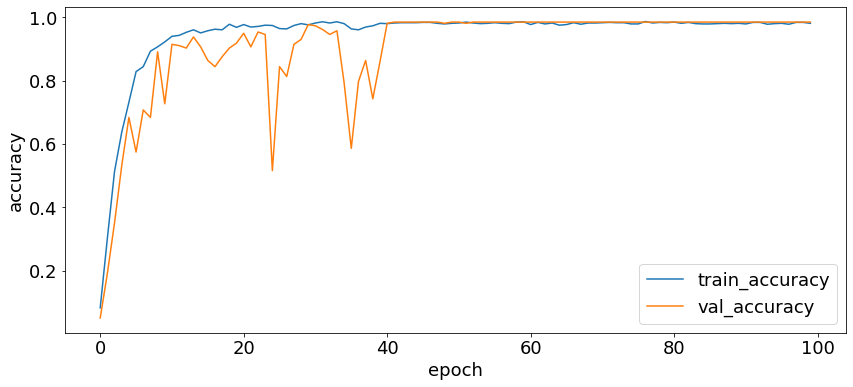

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.rc('font', size=18)

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train_accuracy", "val_accuracy"])
plt.show()

In [36]:
import pickle
from glob import iglob
import numpy as np
import librosa
from shutil import rmtree
from constants import *

OUTPUT_VAL_DIR = '../output_val_una_augmentation'

OUTPUT_DIR_VAL_TRAIN = os.path.join(OUTPUT_VAL_DIR, 'train')
OUTPUT_DIR_VAL_TEST = os.path.join(OUTPUT_VAL_DIR, 'test')

DATA_AUDIO_VAL_DIR = '../vad_test_audio'

DATA_AUDIO_DIR = '../augmentation4_train_data'

# del_folder(OUTPUT_DIR_VAL_TRAIN)
# del_folder(OUTPUT_DIR_VAL_TEST)
# mkdir_p(OUTPUT_DIR_VAL_TRAIN)
# mkdir_p(OUTPUT_DIR_VAL_TEST)


In [37]:
PAD_SIZE = 0
TARGET_SR = 8000
AUDIO_LENGTH = TARGET_SR * 10
SEGMENT_NUM = 1

In [38]:
def convert_val_data():
    
    
    for i, wav_filename in enumerate(iglob(os.path.join(DATA_AUDIO_VAL_DIR, '**/**.wav'), recursive=True)):
        class_id = extract_class_id(wav_filename)
        audio_buf = read_audio_from_filename(wav_filename, target_sr=TARGET_SR)
        
        # normalize mean 0, variance 1
        audio_buf = (audio_buf - np.mean(audio_buf)) / np.std(audio_buf)
        original_length = len(audio_buf)
        print(i, wav_filename, original_length, np.round(np.mean(audio_buf), 4), np.std(audio_buf))
        
        voice_seg = []
        voice_seg.append(audio_buf[PAD_SIZE : AUDIO_LENGTH + PAD_SIZE])
          

        output_folder = OUTPUT_DIR_VAL_TRAIN

        output_filename = os.path.join(output_folder, str(wav_filename[17:-4]).replace('/', '_') + '.pkl')
        out_segs = []
        for i_seg, audio_seg in enumerate(voice_seg) :
            out = {'class_id': class_id,
               'audio': audio_seg,
               'sr': TARGET_SR}
            
            with open(str(output_filename+"_"+str(i_seg)), 'wb') as w:
                pickle.dump(out, w)

            print(str(output_filename+"_"+str(i_seg)))
        
        print("-----------------")

if __name__ == '__main__':
    convert_val_data()

0 ../vad_test_audio/2017019880001_kimsubin/5.wav 164937 -0.0 1.0
../output_val_una_augmentation/train/_2017019880001_kimsubin_5.pkl_0
-----------------
1 ../vad_test_audio/2017019880001_kimsubin/4.wav 173195 0.0 1.0
../output_val_una_augmentation/train/_2017019880001_kimsubin_4.pkl_0
-----------------
2 ../vad_test_audio/2017019880001_kimsubin/6.wav 141007 -0.0 1.0
../output_val_una_augmentation/train/_2017019880001_kimsubin_6.pkl_0
-----------------
3 ../vad_test_audio/2017019880001_kimsubin/3.wav 177730 -0.0 1.0
../output_val_una_augmentation/train/_2017019880001_kimsubin_3.pkl_0
-----------------
4 ../vad_test_audio/2017019880001_kimsubin/2.wav 175501 0.0 1.0
../output_val_una_augmentation/train/_2017019880001_kimsubin_2.pkl_0
-----------------
5 ../vad_test_audio/2017019880001_kimsubin/1.wav 177435 -0.0 1.0
../output_val_una_augmentation/train/_2017019880001_kimsubin_1.pkl_0
-----------------
6 ../vad_test_audio/2017019740029_limdonggeun/1.wav 175243 -0.0 1.0
../output_val_una_augm

In [39]:
from sklearn.metrics import accuracy_score

val_files = glob(os.path.join(OUTPUT_DIR_VAL_TRAIN, '**.pkl_*'))
val_files.sort()

x_val, y_val = get_data(val_files)
print('y_val : ', y_val)
print(x_val.shape, y_val.shape)
pred_out = model.predict(x_val)

real =[]
pred_out_idex=[]

list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

j = 0
for i,pred in enumerate(pred_out) :
    if np.argmax(pred) != y_val[i]:
        print('\033[31m'+"Predict :"+str(list_dir[np.argmax(pred)])+" , Real :"+str(list_dir[y_val[i]])+", Likelihood :"+str(np.max(pred)))
    else:
        print('\033[30m'+"Predict :"+str(list_dir[np.argmax(pred)])+" , Real :"+str(list_dir[y_val[i]])+", Likelihood :"+str(np.max(pred)))
    real.append(list_dir.index(list_dir[y_val[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print ('\n\033[30m'+"Final Predict Likelihood : "+format(accuracy_score(real, pred_out_idex)*100, ".4f"))

y_val :  [ 0  0  0  0  0  0 13 13 13 13 13 13 28 43 43 43 43 43 43 83 83 83 83 83
 83]
(25, 80000, 1) (25,)
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.99802434
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.99386877
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9991474
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9982326
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9995808
Predict :2017019770016_parkjongae , Real :2017019740001_kwakjuheon, Likelihood :0.49106115
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.97875834
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.9915187
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.98599213
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.9431162
Pre

In [40]:
from keras.models import load_model
model.save('Identity_Predictionor.h5')

In [41]:
# 학습된 모델 불러오기

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
from sklearn.metrics import accuracy_score
from glob import glob

val_files = glob(os.path.join(OUTPUT_DIR_VAL_TRAIN, '**.pkl_*'))
val_files.sort()

x_val, y_val = get_data(val_files)
print('y_val : ', y_val)
print(x_val.shape, y_val.shape)

real =[]
pred_out_idex=[]

list_dir = os.listdir(DATA_AUDIO_DIR)
list_dir.sort()

from keras.models import load_model
test_model = load_model('Identity_Predictionor.h5')

yhat = test_model.predict(x_val)
    
j = 0
for i,pred in enumerate(yhat) :
    if np.argmax(pred) != y_val[i]:
        print('\033[31m'+"Predict :"+str(list_dir[np.argmax(pred)])+" , Real :"+str(list_dir[y_val[i]])+", Likelihood :"+str(np.max(pred)))
    else:
        print('\033[30m'+"Predict :"+str(list_dir[np.argmax(pred)])+" , Real :"+str(list_dir[y_val[i]])+", Likelihood :"+str(np.max(pred)))
    real.append(list_dir.index(list_dir[y_val[i]]))
    pred_out_idex.append(np.argmax(pred))
    
# get the accuracy
print ('\n\033[30m'+"Final Predict Likelihood : "+format(accuracy_score(real, pred_out_idex)*100, ".4f"))

y_val :  [ 0  0  0  0  0  0 13 13 13 13 13 13 28 43 43 43 43 43 43 83 83 83 83 83
 83]
(25, 80000, 1) (25,)
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.99802434
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.99386877
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9991474
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9982326
Predict :2017019740001_kwakjuheon , Real :2017019740001_kwakjuheon, Likelihood :0.9995808
Predict :2017019770016_parkjongae , Real :2017019740001_kwakjuheon, Likelihood :0.49106115
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.97875834
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.9915187
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.98599213
Predict :2017019740014_leesumin , Real :2017019740014_leesumin, Likelihood :0.9431162
Pre